In [19]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import datetime as dt 
import matplotlib.dates as mdates 

In [20]:
# df = pd.read_csv('sandp500/all_stocks_1yr.csv', parse_dates = True, index_col = 0)

all5df = pd.read_csv('sandp500/all_stocks_5yr.csv')
all5df.head()


,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [25]:
total = all5df.isnull().sum().sort_values(ascending=False) #counts all null cells in a row
percent = ((all5df.isnull().sum()/all5df.isnull().count()).sort_values(ascending=False)*100) #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) #combines the two matrixies
missing_data #this displays the matrix

,Total,Percent
Volume,406,0.066908
Open,384,0.063283
Low,227,0.037409
High,208,0.034278
Name,0,0.000000
Close,0,0.000000
Date,0,0.000000


In [21]:
stocknames=all5df.Name.unique() 
stocknames=np.sort(stocknames,kind='quicksort') 
print(stocknames) 

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC' 'APD'
 'APH' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA'
 'BAC' 'BAX' 'BBT' 'BBY' 'BCR' 'BDX' 'BEN' 'BF.B' 'BHF' 'BHGE' 'BIIB' 'BK'
 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'C' 'CA' 'CAG' 'CAH' 'CAT'
 'CB' 'CBG' 'CBOE' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF' 'CFG' 'CHD' 'CHK'
 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS'
 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CRM'
 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL'
 'DD' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DISH' 'DLPH'
 'DLR' 'DLTR' 'DOV' 'DOW' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DXC'
 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX'

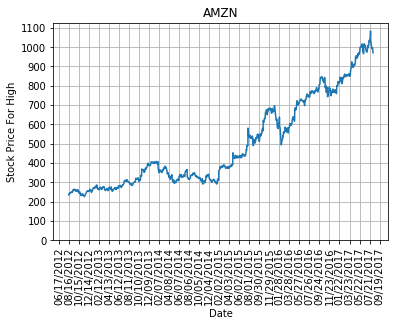

In [24]:
stock = 'AMZN' 
catagory = 'High'
allstocksingle = all5df[all5df['Name'] == stock] #makes matrix with only the stock info

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in allstocksingle['Date']] #convert date to something python understands
y = allstocksingle[catagory] #plots which ever catagory you entered above

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) #x axis tick every 60 days
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100

plt.plot(x,y) #plots the x and y
plt.grid(True) #turns on axis grid
plt.ylim(0) #sets the y axis min to zero
plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
plt.title(stock) #prints the title on the top
plt.ylabel('Stock Price For '+ catagory) #labels y axis
plt.xlabel('Date') #labels x axis

plt.show()

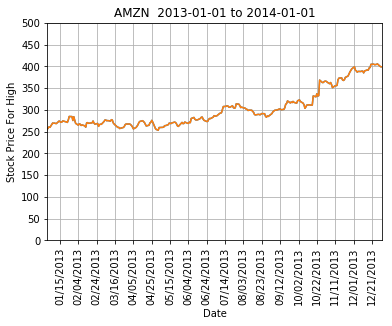

In [30]:
startdate = ('2013-01-01') #enter the start date here, it must be YYYY-MM-DD
enddate = ('2014-01-01') #enter the end date here, it must be YYYY-MM-DD

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20)) #x axis tick every 20 days
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50)) # sets y axis tick spacing to 50

plt.plot(x,y) #plots the x and y
plt.grid(True)
plt.xlim(startdate,enddate) #this is the new line of code that sets the start and end limits on the x axis
plt.ylim(0, 500) #sets the y axis min to zero and y max to 500
plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
plt.title(stock+ '  '+ startdate + ' to ' + enddate) #prints the title on the top

plt.ylabel('Stock Price For '+ catagory) #labels y axis
plt.xlabel('Date') #labels x axis
plt.show()